In [1]:
import pandas as pd

# Load the uploaded files
test_data = pd.read_csv('../data/test.csv')
train_data = pd.read_csv('../data/train.csv')

# Calculate MAD for train and test datasets
train_mad = (train_data['value'] - train_data['predicted']).abs().mean()
test_mad = (test_data['value'] - test_data['predicted']).abs().mean()

# Print the results
print("Mean Absolute Deviation for Train Dataset:", train_mad)
print("Mean Absolute Deviation for Test Dataset:", test_mad)


Mean Absolute Deviation for Train Dataset: 48.216031164420095
Mean Absolute Deviation for Test Dataset: 2.9758615010066665


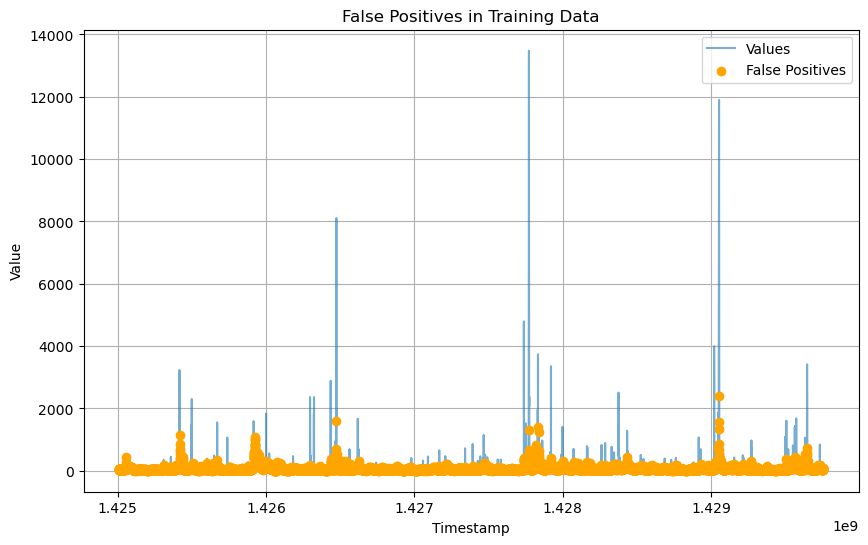

,timestamp,value,predicted
count,1.505400e+04,15054.000000,15054.000000
mean,1.427378e+09,61.841039,70.617241
std,1.369882e+06,72.402157,86.981070
min,1.425009e+09,0.000000,-281.389070
25%,1.426188e+09,28.000000,32.783538
50%,1.427372e+09,45.000000,49.412977
75%,1.428562e+09,72.000000,75.179989
max,1.429757e+09,2393.000000,2716.127200


In [6]:
import matplotlib.pyplot as plt

# Filter for false positives
false_positives_data = train_data[(~train_data['is_anomaly']) & (train_data['value'] != train_data['predicted'])]

# Plot false positives on the training data
plt.figure(figsize=(10, 6))
plt.plot(train_data['timestamp'], train_data['value'], label='Values', alpha=0.6)
plt.scatter(
    false_positives_data['timestamp'], 
    false_positives_data['value'], 
    color='orange', label='False Positives', zorder=5
)
plt.title('False Positives in Training Data')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

false_positive_stats = false_positives_data.describe()
false_positive_stats



The plot and the summary statistics shown  provide insight into the model's performance, focusing on the false positives identified in the training data.

## Plot Explanation
### Blue Line: Represents the observed values (value) over time.
Orange Dots: Represent false positives, i.e., points where the model incorrectly flagged normal observations as anomalies.
The false positives are clustered in regions where there are deviations or spikes in the observed values, indicating the model might be overly sensitive to these variations.

### Summary Statistics Explanation
The table below the plot provides descriptive statistics for the false positive data:

Count: There are 15,054 false positives in the dataset.

Mean (value): The average observed value of the false positives is 61.84, with a predicted average (predicted) of 70.62.

Standard Deviation (std): The standard deviation of the observed values is 72.40, indicating significant variation in the observed data. The predictions (predicted) also have a high standard deviation (86.98).

Min and Max:
The minimum value is 0.0, and the maximum is 2393.0 for value, suggesting that the false positives include both low and extreme high values.
For predicted, the range is much wider (-281.39 to 2716.13).

Quartiles (25%, 50%, 75%):
These show the distribution of observed values for false positives:
25% of values are below 28.
The median (50%) is 45.
75% of values are below 72.